# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center>  Discussion 02: 12 April 2023 </center>

Let's start by importing some packages. We'll point out which of these imports we are using throughout the discussion, but it's handy to have them all in one place at the top of your notebook. This way, you can reload the imports without having to re-run everything else.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

     
seed=1234
np.random.seed(seed)

---
## Part 1 : Plotting with Matplotlib

The first part of this discussion is a tutorial on how to use [Matplotlib (Pyplot)](https://matplotlib.org/stable/index.html) to create highly customizable plots in Python. This discussion will only cover the bare essentials of `matplotlib` -- you are encouraged to read the [documentation](https://matplotlib.org/stable/index.html) on your own, and to explore what is possible. For your homeworks, you should use the default settings for your plots unless told otherwise.



In Dis01, we saw how to install `matplotlib` into our `cs178` environment via `conda`. Make sure you have activated your `cs178` environment in order to make use of this package.


To import `pyplot`, run the following line of code. By convention, `plt` is used as shorthand for `matplotlib.pyplot`. 


In [2]:
import matplotlib.pyplot as plt

Before creating a plot, let's first make some data.
- `x` is a numpy array containing 50 evenly spaced points in the interval $[0, 2\pi]$.
- `y` is a numpy array, where `y[i] = sin(x[i])` is the sine of the corresponding element in `x`.
- Note that we can create `y` without a for loop by using `np.sin(...)`.
- `z` is a numpy array containing the cosine of `x`.

In [3]:
# Evenly spaced points between 0 and 1
x = np.linspace(0, 2*np.pi, 50)
x.shape

(50,)

In [4]:
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [5]:
# Compute sin(x) for every value in x
y = np.sin(x)
y.shape

(50,)

In [6]:
y

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In [7]:
# Compute cos(x) for every value in x
z = np.cos(x)
z.shape

(50,)

Now that we have some data, we can plot our sine and cosine curves.
- Create a figure object `fig` and an axes `axes` object using `plt.subplots()`.
- `fig` is a figure which can contain many subplots ("axes").
- Here, we are creating a figure with only one subplot.
- We can modify subplots by calling various functions on the corresponding axes.
- For example, `axes.plot(x, y)` will create a line plot from the data contained in `x` and `y`.

Note that in the final line we write `axes.plot(x, y);` -- there is an extra semicolon at the end. This is just included to prevent the Jupyter notebook from printing out a representation of the last line being run. This is not necessary, but can help make your notebook look a little cleaner.

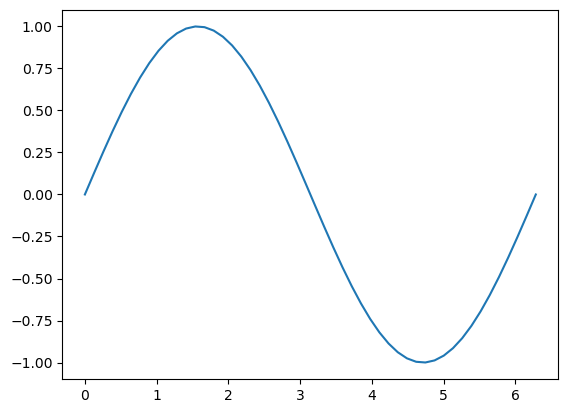

In [8]:
fig, axes = plt.subplots()  # Create figure and axes
axes.plot(x, y);            # Create line plot of x vs y
#axes.plot(x, y)            # Without semicolon -- prints out a representation of the axes object

Our plot is looking a little too empty. Let's improve our plot:
- We can label the axes using by calling the `set_xlabel(...)` and `set_ylabel(...)` functions of an `axes` object.
    - The default font size is a little small. We can use the argument `fontsize=...` to change this to our liking. If we don't pass in this argument, you'll get the default font size for your axis labels.
- We can add a title with the function `set_title(...)`.
- You can change the x-axis and y-axis limits by using the functions `set_xlim(...)` and `set_ylim(...)`. `matplotlib` will try to automatically infer these from your data, but it sometimes is useful to be able to set these manually.

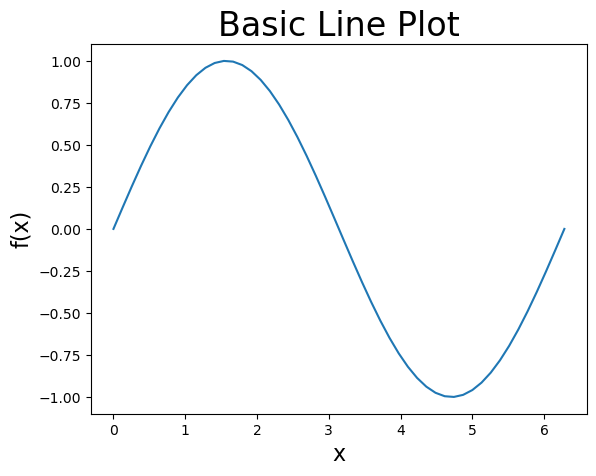

In [9]:
# Create a figure and plot y = sin(x)
fig, axes = plt.subplots()
axes.plot(x, y)

# Label the axes
#axes.set_xlabel('x')
#axes.set_ylabel('f(x)')
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Basic Line Plot', fontsize=24);

# Change the x-axis limit
#axes.set_xlim(0, 4*np.pi);

Now that you have a basic idea of how to create plots in `matplotlib`, let's look at some more complicated examples.

Recall that above, we created two arrays: `y = np.sin(x)` and `z = np.cos(x)`. Let's plot both of these as line plots in the same figure.
- We can do this by just calling `axes.plot(...)` a second time.
- We can specify the colors of our lines with the argument `color='...'` in the `axes.plot()` function. 
- When there are multiple lines in a plot, it is often a good idea to include a legend. We can specify the name of each line with the argument `label='...'` in the `axes.plot()` function, and include a new line `axes.legend()`.
- You can specify the location of the legend by passing in the argument `loc='...'` -- for example, `axes.legend(loc = 'upper right')` will make the legend appear in the top right. If no argument is specified, `matplotlib` tries to automatically infer the best position.

In [ ]:
# Create a figure
fig, axes = plt.subplots()
axes.plot(x, y, color='red', label='sin(x)')    # <---  Plot y = sin(x)
axes.plot(x, z, color='blue', label='cos(x)')   # <---  Plot z = cos(x)

# Label the axes
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Fancier Line Plot', fontsize=24)

# Add a legend to the plot
axes.legend(fontsize=12);
#axes.legend(loc = 'best');   # Equivalent to the previous line
#axes.legend(loc = 'upper right');

So far, we've seen how to create and customize line plots. However, `matplotlib` supports many other types of plots as well. For example, scatter plots:
- To create a scatter plot, simply call `axes.scatter(...)` instead of `axes.plot(...)`.

In [ ]:
# Create a figure
fig, axes = plt.subplots()
axes.scatter(x, y, color='red', label='sin(x)')    # <---  Plot y = sin(x)
axes.scatter(x, z, color='blue', label='cos(x)')   # <---  Plot z = cos(x)

# Label the axes
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Scatter Plot', fontsize=24)

# Add a legend to the plot
axes.legend(fontsize=12);
#axes.legend(loc = 'best');   # Equivalent to the previous line
#axes.legend(loc = 'upper right');

You now know how to create figures with a single subplot. In several homework problems, you will create plots that have multiple subplots. For example, let's create a figure with 4 subplots in total, in a 2x2 grid. To do this:
- Call `fig, axes = plt.subplots(2, 2)`. This will create a single figure `fig` that has our 4 subplots. `axes` will now be a list of axes objects -- for example, `axes[0,0]` corresponds to the subplot in the first row and the first column (i.e. the top left).
- To create a subplot in row `i` and column `j`, we can call the appropriate functions on `axes[i,j]`.
- Each subplot can have its own x-label, y-label, title, etc. 
- Sometimes, when we have many subplots, they can overlap. This can be fixed by calling `fig.tight_layout()` after doing the rest of our plotting.
- We can create a title for our entire figure using `fig.suptitle(...)`.

In [ ]:
# Create a figure with 4 subplots -- 2 rows, 2 columns
fig, axes = plt.subplots(2, 2)

# Top left
axes[0, 0].plot(x, y, color='red')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title('Top Left')

# Top right
axes[0, 1].scatter(x, y, color='red')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].set_title('Top Right')

# Bottom left
axes[1, 0].plot(x, z, color='blue')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('z')
axes[1, 0].set_title('Bottom Left')

# Bottom right
axes[1, 1].scatter(x, z, color='blue')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('Bottom Right')

# Create title for entire figure
fig.suptitle('2x2 Subplot Grid', fontsize=16)

# Make our subplots not overlap
fig.tight_layout()

---
## Part 2 : Scikit-Learn

In the second part of this week's discussion, you will see how to use the library `scikit-learn` (sometimes called "sklearn"), a popular package for doing machine learning in Python. You will make use of `scikit-learn` in your homeworks throughout this quarter. Importantly, `scikit-learn` is compatible with the other Python packages we have explored so far -- namely, `numpy` and `matplotlib`. 


In Dis01, we saw how to install `scikit-learn` into our `cs178` environment via `conda`. Make sure you have activated your `cs178` environment in order to make use of this package. In addition, make sure you have version 1.1 or newer.

To get started, we'll import several useful things.

In [ ]:
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Let's load a dataset using the function `sklearn.datasets.load_diabetes`. This is a real dataset corresponding to measurements taken from 442 diabetes patients. These patients had various measurements taken as a baseline (these formed the 10 features per observation) and then they had their disease progression measured one year later. This quantitative measurement will be our target of interest. 

_Put differently, we are interested in predicting how a diabetes patient disease progresses in a year given various baseline measurements._

This dataset has 442 datapoints, 10 different features, and 1 target value. The 10 features are:
1. Age of patient
2. Sex of patient
3. Body mass index (BMI)
4. Average blood pressure
5. Total serum cholesterol
6. Low-density lipoproteins (LDL) cholesterol
7. High-density lipoproteins (HDL) cholesterol
8. Total cholesterol / HDL
9. Log of serum triglycerides level
10. Blood sugar level

While a good prediction model will typically take advantage of all of these features, we will restrict ourselves to just 2 of them for the purposes of visualization. We will try to predict disease progression with just knowing a patient's average blood pressure (4) and their blood sugar level (10).

In [ ]:
# Load diabetes dataset
all_X, y = load_diabetes(return_X_y=True, scaled=True)
all_X.shape, y.shape

In [ ]:
X = all_X[:, [3, 9]]  # extract the 4th and 10th columns
X[:5], y[:5]  # Look at first 5 rows of our feature matrix and target values

Let's use our new `matplotlib` skills to create a scatter plot of our dataset.
- We will plot feature values on the x-axis and y-axis of the scatter plot.
- The target value (disease progression) will be represented using colors, with bright colors meaning high values and dark colors meaning low values.
- This can be done by setting the `c=` argument in `axes.scatter(...)` to take on an array of values. The specific colors chosen for each value are determined by the colormap, or `cmap`. We will use `cmap='viridis'` but many other colormaps exist. See [here for examples](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [ ]:
# Make a figure with 1 subplot
fig, axes = plt.subplots()

# Scatter plot of features in X
feature_0 = X[:, 0]  # First column is the first feature
feature_1 = X[:, 1]  # Second column is the second feature

r = axes.scatter(feature_0, feature_1, c=y, cmap="viridis")
fig.colorbar(r, ax=axes, label="Disease Progression")

axes.set_xlabel('Feature 0: Blood Pressure', fontsize=14)
axes.set_ylabel('Feature 1: Blood Sugar', fontsize=14)
axes.set_title('Diabetes Dataset - Scatter Plot', fontsize=18);

While it does appear that as blood pressure and blood sugar increase the disease progression appears to get worse, it is a bit hard to make out clearly. Luckily, `matplotlib` supports 3D plots as well. Here is the same data shown above but projecting the target value into a third z-axis.

In [ ]:
# Make a figure with 1 subplot
fig = plt.figure(figsize=(20, 5))

# Scatter plot of features in X
feature_0 = X[:, 0]  # First column is the first feature
feature_1 = X[:, 1]  # Second column is the second feature


axes = fig.add_subplot(1, 3, 1, projection='3d')
axes.scatter(feature_0, feature_1, y, c=y, cmap="viridis")
axes.set_xlabel("Blood Pressure")
axes.set_ylabel("Blood Sugar")
axes.set_zlabel("Disease Progression")

axes = fig.add_subplot(1, 3, 2)
axes.scatter(feature_0, y, c=y, cmap="viridis")
axes.set_xlabel("Blood Pressure")
axes.set_ylabel("Disease Progression")

axes = fig.add_subplot(1, 3, 3)
axes.scatter(feature_1, y, c=y, cmap="viridis")
axes.set_xlabel("Blood Sugar")
axes.set_ylabel("Disease Progression")

fig.suptitle('Diabetes Dataset - Scatter Plot');

Here is the same 3D plot but seen from different angles:

In [ ]:
# Make a figure with 1 subplot
fig = plt.figure(figsize=(20, 5))

# Scatter plot of features in X
feature_0 = X[:, 0]  # First column is the first feature
feature_1 = X[:, 1]  # Second column is the second feature


for ax_id, angle in enumerate([30, 120, 210]):
    axes = fig.add_subplot(1, 3, ax_id+1, projection='3d')
    axes.scatter(feature_0, feature_1, y, c=y, cmap="viridis")
    axes.set_xlabel("Blood Pressure")
    axes.set_ylabel("Blood Sugar")
    axes.set_zlabel("Disease Progression")
    axes.view_init(30, angle)

fig.suptitle('Diabetes Dataset - Scatter Plot');

Next we'll visualize our dataset further by making a histogram for each of our features.
- As you might guess, we will just use the function `axes[i].hist(...)` to create a histogram.
- We also pass in the argument `edgecolor='black'`, just to help us visually separate the bins.

In [ ]:
# Make a figure with 2 subplots -- 1 row, 2 columns
fig, axes = plt.subplots(1, 2)

# Scatter plot of features in X
feature_0 = X[:, 0]  # First column is the first feature
feature_1 = X[:, 1]  # Second column is the second feature

axes[0].hist(feature_0, edgecolor='black')
axes[0].set_xlabel('Feature 0', fontsize=14)


axes[1].hist(feature_1,  edgecolor='black')
axes[1].set_xlabel('Feature 1', fontsize=14)

fig.suptitle('Diabetes Dataset - Histograms', fontsize=18);

Now that we have a better sense of what our dataset looks like, let's train some models!
- First, we'll split our dataset into a training set and a testing set.
- `scikit-learn` makes this easy: we can use the function `sklearn.model_selection.train_test_split`. This is already imported above.
- The argument `test_size=...` is a percentage, telling us how much of our data will be used for the testing set. The remaining fraction will be used for training. The argument `random_state=...` specifies a seed for the random number generator -- by setting this to a constant, we ensure that we get reproducible results (note this isn't always desirable).

In [ ]:
# Create a train/test split of the 2-moons dataset
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

Now, we can create a linear regression model and fit it on the training data.
- We'll use the sklearn implementation, which is already imported for you with `from sklearn.linear_model import LinearRegression`.
- After creating a classifier with `LinearRegression()`, fitting it to the training data is as easy as calling the function `.fit(...)`.
- See the [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more details on this model.

In [ ]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit it on the training set
linear_model.fit(X_train, y_train);

After training our regressor, let's use it to make predictions.
- We can do this using the method `.predict(...)`.
- We can call the `.predict(...)` method on both the training data and the testing data, in order to make predictions on both sets.

In [ ]:
# Make predictions on the training set
y_pred_train = linear_model.predict(X_train)

# Make predictions on the testing set
y_pred_test = linear_model.predict(X_test)

Let's now see how good our predictions are.
- In this discussion, we'll use the sklearn function, which is already imported for you via `from sklearn.metrics import mean_squared_error`.
- See [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for the documentation for this function.
- In Homework 1, you will implement your own metrics from scratch.

In [ ]:
# Compute mse of predictions on train set
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE (train): {mse_train}')

In [ ]:
# Compute mse of predictions on test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (test): {mse_test}')

Mean squared error can be hard to interpret sometimes as the units are not intuitive. We can also look at other metrics to give us a better sense of how good the predictions are. Here we will also look at the median absolute error:

In [ ]:
# Compute median absolute error of predictions on train set
mae_train = median_absolute_error(y_train, y_pred_train)
print(f'Med. AE (train): {mae_train}')
# Compute median absolute error of predictions on test set
mae_test = median_absolute_error(y_test, y_pred_test)
print(f'Med. AE (test): {mae_test}')

In Homework 1, you are also asked to visualize some regression models. We will demonstrate that here for this model; however, since our model here has 2 input features the methods for doing so will be different than the 1D regression setting.

In [ ]:
# Make a figure with 1 subplot
fig = plt.figure(figsize=(20, 5))

# Scatter plot of features in X
feature_0 = X_train[:, 0]  # First column is the first feature
feature_1 = X_train[:, 1]  # Second column is the second feature

# Get prediction surface
f0_span = np.linspace(feature_0.min(), feature_0.max(), 100)
f1_span = np.linspace(feature_1.min(), feature_1.max(), 100)
f0_span, f1_span = np.meshgrid(f0_span, f1_span)
pred_input = np.stack((f0_span.reshape(-1), f1_span.reshape(-1)), axis=1)
y_pred = linear_model.predict(pred_input)
y_pred = y_pred.reshape(100, 100)


for ax_id, angle in enumerate([70, 160, 250]):
    axes = fig.add_subplot(1, 3, ax_id+1, projection='3d')
    axes.scatter(feature_0, feature_1, y_train, c=y_train, cmap="viridis")
    axes.set_xlabel("Blood Pressure")
    axes.set_ylabel("Blood Sugar")
    axes.set_zlabel("Disease Progression")
    axes.plot_surface(f0_span, f1_span, y_pred, alpha=0.3, linewidth=0, antialiased=False)
    axes.view_init(30, angle)

fig.suptitle('Diabetes Dataset - Scatter Plot');

Let's see if we add 2-degree polynomial features (i.e., quadratic features) we can reduce the test MSE and MAE.

In [ ]:
# Create a linear regression model
quad_model = LinearRegression()
quad_features = PolynomialFeatures(degree=2, include_bias=False)
# Fit it on the training set
quad_model.fit(quad_features.fit_transform(X_train), y_train);

In [ ]:
# Make predictions on the training set
y_pred_train = quad_model.predict(quad_features.fit_transform(X_train))

# Make predictions on the testing set
y_pred_test = quad_model.predict(quad_features.fit_transform(X_test))

In [ ]:
# Compute mse of predictions on train set
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE (train): {mse_train}')
# Compute mse of predictions on test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE (train): {mse_test}')

In [ ]:
# Compute median absolute error of predictions on train set
mae_train = median_absolute_error(y_train, y_pred_train)
print(f'Med. AE (train): {mae_train}')
# Compute median absolute error of predictions on test set
mae_test = median_absolute_error(y_test, y_pred_test)
print(f'Med. AE (test): {mae_test}')

These do result in lower test values for both mean squared error and median absolute error. Let's visualize the new prediction surface:

In [ ]:
# Make a figure with 1 subplot
fig = plt.figure(figsize=(20, 5))

# Scatter plot of features in X
feature_0 = X_train[:, 0]  # First column is the first feature
feature_1 = X_train[:, 1]  # Second column is the second feature

# Get prediction surface
f0_span = np.linspace(feature_0.min(), feature_0.max(), 100)
f1_span = np.linspace(feature_1.min(), feature_1.max(), 100)
f0_span, f1_span = np.meshgrid(f0_span, f1_span)
pred_input = np.stack((f0_span.reshape(-1), f1_span.reshape(-1)), axis=1)
pred_input = quad_features.fit_transform(pred_input)  #### Only new addition to our previous code
y_pred = quad_model.predict(pred_input)
y_pred = y_pred.reshape(100, 100)


for ax_id, angle in enumerate([70, 160, 250]):
    axes = fig.add_subplot(1, 3, ax_id+1, projection='3d')
    axes.scatter(feature_0, feature_1, y_train, c=y_train, cmap="viridis")
    axes.set_xlabel("Blood Pressure")
    axes.set_ylabel("Blood Sugar")
    axes.set_zlabel("Disease Progression")
    axes.plot_surface(f0_span, f1_span, y_pred, alpha=0.3, linewidth=0, antialiased=False)
    axes.view_init(30, angle)

fig.suptitle('Diabetes Dataset - Scatter Plot');

We could technically keep adding higher and higher degrees of polynomial features, but how many is enough? Your homework goes into detail on one way of finding out a good choice in degree.

## Part 3 : Questions?

## Additional Resources
- [Matplotlib Cheatsheets](https://matplotlib.org/cheatsheets/)
- [Scikit-Learn Docs](https://scikit-learn.org/stable/)
- [Scipy Lecture Notes](http://scipy-lectures.org/)